# Support Vector Machine

1. **SVM** performs well in high-dimensional spaces (e.g., text classification or image recognition) due to its ability to construct hyperplanes in such spaces effectively.
2. **SVM** can handle non-linear separable data effectively using kernel tricks (e.g., polynomial, radial basis function (RBF)).
3. **SVM** with a soft margin or appropriate kernel is more robust to **outliers** because it focuses on maximizing the margin and ignores points far away from the margin.

### Fields of sage of SVM 
- **Text Classification**:
SVM can be used for classifying text data into positive and negative categories, such as emails or product reviews.

- **Bioinformatics**:
SVM can be applied to protein classification, gene recognition, and predicting the properties of biomolecules.

- **Computer Vision**:
SVM can be utilized for object detection in images, face recognition, image classification, and more.

- **Financial Analysis**:
SVM can be employed to predict stock prices and classify investment products.

- **Internet Advertising**:
SVM can be used to classify users based on their online behavior and predict which advertisements will be most effective for specific users.

- **Data Analysis**:
SVM can be applied for clustering and classifying data such as customer data, sales data, and manufacturing process data.

- **Medical Diagnosis**:
SVM can be used to classify medical data, such as CT and MRI images, to determine the presence or absence of certain diseases.

In [1]:
import numpy as np
import pandas as pd

# Support Vector Machine
$$ y 
pred
​
 =sign(w⋅x+b) $$

## Loss Function
$$ L=0.5⋅∥w∥ 
2
 +C 
i=1
∑
n
​
 max(0,1−y 
i
​
 (w⋅x 
i
​
 +b)) $$


## for misclassification (w)
$$ w=w−η⋅(2w−C⋅y 
i
​
 ⋅x 
i
​
 ) $$

## Correct one w
$$ w=w−η⋅(2w) $$

## For Bias
$$ b=b−η⋅(−C⋅y 
i
​
 ) $$


### SVM with linear relationship

In [2]:
class SVC:
    """ Implementation of Linear Support Vector Machine """
    def __init__(self, learning_rate, epochs) -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def predict(self, X):
        return (np.dot(X, self.weights) + self.bias) > 0

    def fit(self, X, y, C=1):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):

                y_i = 2 * y[i] - 1

                if y_i * (np.dot(X[i], self.weights) + self.bias) < 1:
                    self.weights -= self.learning_rate * (2 * self.weights - C * y_i * X[i])
                    self.bias -= self.learning_rate * (-C * y_i)
                else:
                    self.weights -= self.learning_rate * (2 * self.weights)
        return self.weights, self.bias

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

""" Dateset To Train the Custom SVM Model """
np.random.seed(42)
n = 50

X1, X2 = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
y = (1 / (1 + np.exp(-(2 * X1 - 1.5 * X2 - 5))) > 0.5).astype(int)

X = np.column_stack((X1, X2))

""" Example Usage """
svm = SVC(learning_rate=0.01, epochs=1000)
svm.fit(X, y)
y_pred = (svm.predict(X) >= 0.5).astype(int)

print("Accuracy: ", accuracy_score(y, y_pred)),print("Confusion Matrix: ", confusion_matrix(y, y_pred))

Accuracy:  0.94
Confusion Matrix:  [[35  0]
 [ 3 12]]


(None, None)

### Support Vector Machine Tips and Concepts

**SVMs** are sensitive to the feature scales (use **StandardScaler** from **scikit-learn**).

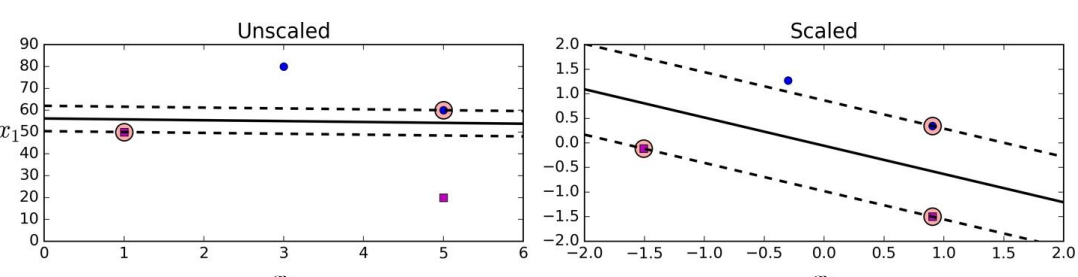

### Soft Margin Classification
- **Hard** Margin on the right
   1. It **only** works if the data is **linearly** separable.
   2. It is quite **sensitive** to **outliers**.
- **Soft** Margin to avoid these issues
   1. The objective is to find a good balance between keeping the street **as large as** possible and limiting the **margin violations**

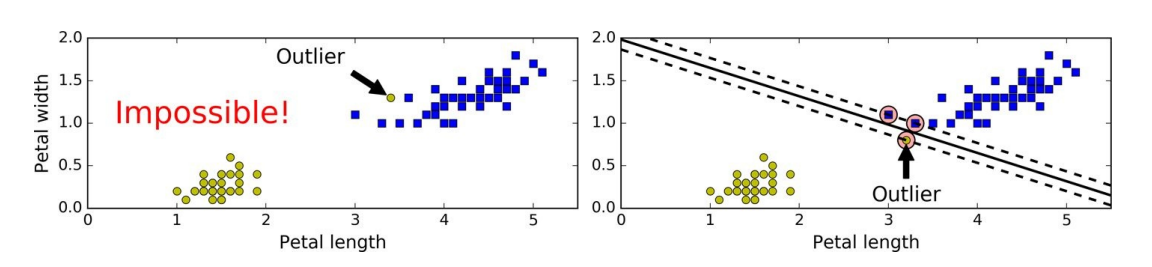

### **C** hyperparameter balancing
-  **A smaller C** value leads to a **wider street** but more margin
violations

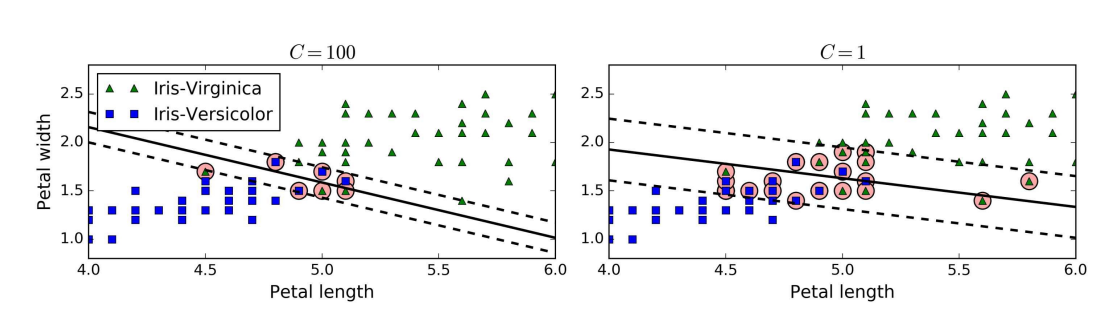

**Important!** 

If your SVM model is **overfitting**, you can try regularizing it by reducing **C**. 

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

moons = make_moons()

X, y = make_moons(n_samples=5000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

non_linear_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("model",SVC(kernel="poly", C=5, coef0=1, degree=10))
])


non_linear_svm.fit(X_train, y_train)
y_pred = non_linear_svm.predict(X_test)

np.mean(y_test==y_pred), confusion_matrix(y_test, y_pred)

(0.966,
 array([[462,  14],
        [ 20, 504]], dtype=int64))

In [5]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

svc.fit(X, y)
y_pred = svc.predict(X)

confusion_matrix(y, y_pred), accuracy_score(y, y_pred)

(array([[49,  1,  0],
        [ 0, 43,  7],
        [ 0,  3, 47]], dtype=int64),
 0.9266666666666666)